In [1]:
import pandas as pd
import numpy as np
from io import StringIO
dfTrain = pd.read_csv("Data/train.csv")
dfTest = pd.read_csv("Data/test.csv")



In [2]:
#next we drop simialr record columns
dfTrain = dfTrain.drop('apache_3j_bodysystem', axis=1)
dfTest = dfTest.drop('apache_3j_bodysystem', axis=1)

In [3]:

#next we drop columns that have less -0.1<corelation<0.1 with hospital_death
# create correlation matrix
corr_matrix = dfTrain.corr()

# get the columns with correlation less than -0.1 and greater than 0.1
corr_cols = corr_matrix.columns[(corr_matrix['hospital_death'] > -0.1) & (corr_matrix['hospital_death'] < 0.1)]

# remove the first element of the array
corr_cols = corr_cols[1:]
corr_cols
# drop the columns with correlation gr8 than -0.1 and less than 0.1
# FILEPATH: c:\Users\hamza\Documents\7th Sem\IDM\Challenge 1\C1.ipynb
dfTrain = dfTrain.drop(corr_cols, axis=1)
dfTest=dfTest.drop(corr_cols, axis=1)


C:\Users\hamza\AppData\Local\Temp\ipykernel_20736\3604662654.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


In [ ]:
corr_matrix = dfTrain.corr()
corr_matrix['hospital_death'].sort_values(ascending=False)


In [5]:

#next we drop columns that have less -0.1<corelation<0.1 with hospital_death
# create correlation matrix
corr_matrix = dfTrain.corr()

# get the columns with correlation less than -0.1 and greater than 0.1
corr_cols = corr_matrix.columns[(corr_matrix['hospital_death'] > 0.1) & (corr_matrix['hospital_death'] < 0.2)]

# remove the first element of the array
# corr_cols = corr_cols[1:]
corr_cols
# drop the columns with correlation gr8 than -0.1 and less than 0.1
# FILEPATH: c:\Users\hamza\Documents\7th Sem\IDM\Challenge 1\C1.ipynb
dfTrain = dfTrain.drop(corr_cols, axis=1)
dfTest=dfTest.drop(corr_cols, axis=1)


C:\Users\hamza\AppData\Local\Temp\ipykernel_20736\3664579305.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()


In [6]:

#next we drop columns that have less -0.1<corelation<0.1 with hospital_death
# create correlation matrix
# corr_matrix = dfTrain.corr()

# get the columns with correlation less than -0.1 and greater than 0.1
corr_cols = corr_matrix.columns[(corr_matrix['hospital_death'] < 0) & (corr_matrix['hospital_death'] >-0.2)]

# remove the first element of the array
# corr_cols = corr_cols[1:]
corr_cols
# len(corr_cols)
# drop the columns with correlation gr8 than -0.1 and less than 0.1
# FILEPATH: c:\Users\hamza\Documents\7th Sem\IDM\Challenge 1\C1.ipynb
dfTrain = dfTrain.drop(corr_cols, axis=1)
dfTest=dfTest.drop(corr_cols, axis=1)


In [7]:
# set the correlation threshold
corr_threshold = 0.9

# create correlation matrix
corr_matrix = dfTrain.corr()

# get the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find all correlations with a value greater than the threshold
high_corr = upper.stack().sort_values(ascending=False)[upper.stack() > corr_threshold]

# get the columns with high correlation
high_corr_cols = set(high_corr.index.get_level_values(0)) | set(high_corr.index.get_level_values(1))

# drop the columns with correlation >0.99
high_corr_cols = list(high_corr_cols)
high_corr_cols.sort(key=lambda x: abs(corr_matrix.loc[x, 'hospital_death']), reverse=True)
high_corr_cols = high_corr_cols[:8]
dfTrain = dfTrain.drop(high_corr_cols, axis=1)
dfTest = dfTest.drop(high_corr_cols, axis=1)

# print the columns with high correlation
print("Columns with high interdependency:")
print(high_corr_cols)


Columns with high interdependency:
['d1_sysbp_noninvasive_min', 'd1_sysbp_min']


C:\Users\hamza\AppData\Local\Temp\ipykernel_20736\1033782445.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dfTrain.corr()
C:\Users\hamza\AppData\Local\Temp\ipykernel_20736\1033782445.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [8]:
dfTrain.shape

(50000, 16)

In [9]:
dfTest.shape

(30000, 15)

In [10]:
dfTest.drop('gender', axis=1, inplace=True)
dfTrain.drop('gender', axis=1, inplace=True)

In [3]:
#do for resprate_apache as well
dfTrain['d1_resprate_max'] = np.log1p(dfTrain['d1_resprate_max'])
#make hsitogram of normlaised Train['pre_icu_los_days']


In [4]:
dfTest['d1_resprate_max'] = np.log1p(dfTest['d1_resprate_max'])


In [5]:
#do for temp_apache as well
dfTrain['temp_apache'] = np.log1p(dfTrain['temp_apache'])
#do for test as well
dfTest['temp_apache'] = np.log1p(dfTest['temp_apache'])



In [6]:
#do foor d1_resprate_max as well
dfTest['d1_resprate_max'] = np.log1p(dfTest['d1_resprate_max'])
#do for test as well
dfTrain['d1_resprate_max'] = np.log1p(dfTrain['d1_resprate_max'])

In [7]:
#do for d1_temp_min
dfTrain['d1_temp_min'] = np.log1p(dfTrain['d1_temp_min'])
#do for test as well
dfTest['d1_temp_min'] = np.log1p(dfTest['d1_temp_min'])

In [8]:
#do foe h1_spo2_max
dfTrain['h1_spo2_min'] = np.log1p(dfTrain['h1_spo2_min'])
#do for test as well
dfTest['h1_spo2_min'] = np.log1p(dfTest['h1_spo2_min'])

In [10]:
typesobject=dfTrain.dtypes[dfTrain.dtypes=='object'].index.tolist()
typesobject

['ethnicity',
 'gender',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_2_bodysystem']

In [11]:
NOTtypesobject=dfTrain.dtypes[dfTrain.dtypes!='object'].index.tolist()
NOTtypesobject

['RecordID',
 'hospital_id',
 'icu_id',
 'age',
 'elective_surgery',
 'pre_icu_los_days',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'heart_rate_apache',
 'intubated_apache',
 'resprate_apache',
 'temp_apache',
 'ventilated_apache',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_mbp_min',
 'd1_mbp_noninvasive_min',
 'd1_resprate_max',
 'd1_spo2_min',
 'd1_sysbp_min',
 'd1_sysbp_noninvasive_min',
 'd1_temp_min',
 'h1_diasbp_min',
 'h1_diasbp_noninvasive_min',
 'h1_heartrate_max',
 'h1_heartrate_min',
 'h1_mbp_max',
 'h1_mbp_min',
 'h1_mbp_noninvasive_max',
 'h1_mbp_noninvasive_min',
 'h1_resprate_max',
 'h1_resprate_min',
 'h1_spo2_max',
 'h1_spo2_min',
 'h1_sysbp_max',
 'h1_sysbp_min',
 'h1_sysbp_noninvasive_max',
 'h1_sysbp_noninvasive_min',
 'd1_glucose_max',
 'd1_potassium_max',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob',
 

In [12]:
dfTrain.columns

Index(['RecordID', 'hospital_id', 'icu_id', 'ethnicity', 'gender',
       'icu_admit_source', 'icu_stay_type', 'icu_type', 'apache_2_bodysystem',
       'age', 'elective_surgery', 'pre_icu_los_days', 'apache_2_diagnosis',
       'apache_3j_diagnosis', 'apache_post_operative', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_unable_apache', 'gcs_verbal_apache',
       'heart_rate_apache', 'intubated_apache', 'resprate_apache',
       'temp_apache', 'ventilated_apache', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_min', 'd1_heartrate_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_min', 'd1_resprate_max', 'd1_spo2_min',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_min', 'd1_temp_min',
       'h1_diasbp_min', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max',
       'h1_heartrate_min', 'h1_mbp_max', 'h1_mbp_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'h1_

In [13]:
#for all binary columns we will apply knn imputer for missing values
#first we will create a list of all binary columns
binary_cols = ['ventilated_apache']
#now we will apply knn imputer on these columns
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dfTrain[binary_cols] = imputer.fit_transform(dfTrain[binary_cols])
dfTest[binary_cols] = imputer.fit_transform(dfTest[binary_cols])


In [10]:
numeric_cols = [col for col in dfTrain.select_dtypes(include=[np.number]).columns]
# make a dataframe for numeric values
numeric_data = dfTrain[numeric_cols]

In [11]:
numeric_colsTest = [col for col in dfTest.select_dtypes(include=[np.number]).columns]
numeric_dataTest = dfTest[numeric_colsTest]


In [12]:
#now run mean imputer on numeric_data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
dfTrain[numeric_cols] = imputer.fit_transform(dfTrain[numeric_cols])
#do same for test
dfTest[numeric_colsTest] = imputer.fit_transform(dfTest[numeric_colsTest])

In [13]:
categorical_data = dfTest.select_dtypes(exclude=[np.number])
categorical_dataTest = dfTrain.select_dtypes(exclude=[np.number])

In [14]:
#fill in the cateogrical data using mode iputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
dfTest[categorical_data.columns] = imputer.fit_transform(dfTest[categorical_data.columns])
#do same for test
dfTrain[categorical_dataTest.columns] = imputer.fit_transform(dfTrain[categorical_dataTest.columns])

In [15]:
dfTrain.isnull().sum().sum()

0

In [16]:
dfTrain['apache_2_bodysystem'] = dfTrain['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')
dfTest['apache_2_bodysystem'] = dfTest['apache_2_bodysystem'].replace(['Undefined Diagnoses'], 'Undefined diagnoses')

In [17]:
Train = pd.get_dummies(dfTrain)
Test = pd.get_dummies(dfTest)


In [18]:
X = Train.loc[:, Train.columns != 'hospital_death']
y = Train[['hospital_death']]

In [19]:
#now i want to run knearest neightour machine learning model on this prepared data
#first we will split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

# select only the required columns
cols = ['hospital_id', 'icu_id', 'age', 'pre_icu_los_days', 'apache_3j_diagnosis', 'gcs_verbal_apache', 'heart_rate_apache', 'resprate_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_resprate_max', 'd1_spo2_min', 'd1_sysbp_min', 'd1_temp_min', 'h1_mbp_max', 'h1_mbp_noninvasive_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'd1_potassium_max', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob']
X_train = X_train[cols]
X_test = X_test[cols]

# Fit the model on the transformed X_train
model = KNeighborsClassifier(n_neighbors=1000)
model.fit(X_train, y_train)

# Predict and evaluate on the transformed X_test
y_pred = model.predict_proba(X_test)[:, 1]
print(roc_auc_score(y_test, y_pred))


C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.7141544695559171


In [ ]:
hospital_death_prob = model.predict_proba(TT)
# The predicted probabilities of each class are stored in the second column of the output array
hospital_death = hospital_death_prob[:, 1]

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

def fit_model(model, model_name):
    model.fit(X_train,y_train)
    md_probs = model.predict_proba(X_test)
    md_probs = md_probs[:,1]
    md_auc = roc_auc_score(y_test, md_probs)
    print(model_name, " : ", md_auc)
    md_fpr, md_tpr, _ = roc_curve(y_test, md_probs)
    pyplot.plot(md_fpr, md_tpr, marker='.', label=model_name)
    #return (md_fpr, md_tpr)

C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


k-NN11  :  0.5460508253111309


C:\Users\hamza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Scaled k-NN11  :  0.797655223139086


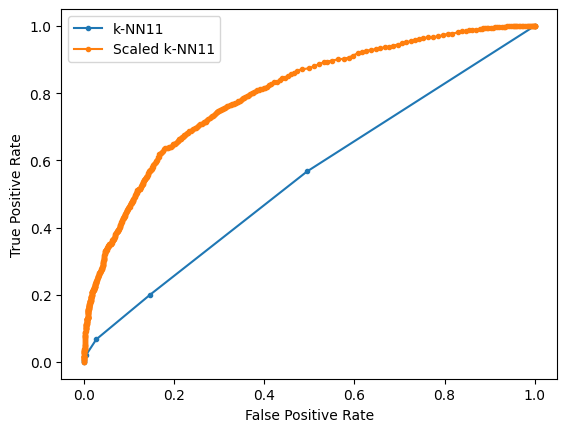

In [143]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.pipeline import Pipeline
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsClassifier
# kn = KNeighborsClassifier(n_neighbors=5)
# fit_model(kn, "k-NN")

# pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])
# fit_model(pipe_kn, "Scaled k-NN")

# kn8 = KNeighborsClassifier(n_neighbors=8)
# fit_model(kn8, "k-NN8")

# pipe_kn8 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=8))])
# fit_model(pipe_kn8, "Scaled k-NN8")

# kn3 = KNeighborsClassifier(n_neighbors=3)
# fit_model(kn3, "k-NN3")

# pipe_kn3 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=3))])
# fit_model(pipe_kn3, "Scaled k-NN3")

kn11 = KNeighborsClassifier(n_neighbors=10)
fit_model(kn11, "k-NN11")

pipe_kn11 = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=2000))])
fit_model(pipe_kn11, "Scaled k-NN11")

pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [142]:
#predict using pipe_kn11
predictions = pipe_kn11.predict(Test)
# y_pred = pd.DataFrame(y_pred)
# y_pred.to_csv('y_pred.csv')
predictions
# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(predictions, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictionsknn.csv', index=False)

In [27]:
dfTrainNONUMERIC.shape

(50000, 7)

In [28]:
dfTestNONUMERIC.head()

,RecordID,ethnicity,icu_admit_source,icu_stay_type,icu_type,apache_2_bodysystem
0,50001.0,Caucasian,Accident & Emergency,admit,CCU-CTICU,Cardiovascular
1,50002.0,Other/Unknown,Accident & Emergency,admit,Neuro ICU,Neurologic
2,50003.0,Caucasian,Floor,transfer,CSICU,Cardiovascular
3,50004.0,Other/Unknown,Accident & Emergency,admit,Med-Surg ICU,Neurologic
4,50005.0,African American,Accident & Emergency,admit,CCU-CTICU,Respiratory


In [29]:
dfTestNONUMERIC.loc[dfTestNONUMERIC['ethnicity'] != 'Caucasian', 'ethnicity'] = 'Others'
dfTrainNONUMERIC.loc[dfTrainNONUMERIC['ethnicity'] != 'Caucasian', 'ethnicity'] = 'Others'



In [30]:
dfTrainNONUMERIC['icu_type'] = dfTrainNONUMERIC['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')
dfTestNONUMERIC['icu_type'] = dfTestNONUMERIC['icu_type'].replace(['Cardiac ICU', 'CSICU', 'CTICU', 'CCU-CTICU'], 'Cardiac related')

In [31]:
dfTrainNONUMERIC['icu_stay_type'] = dfTrainNONUMERIC['icu_stay_type'].replace(['transfer', 'readmit'], 'Not Admit')
dfTestNONUMERIC['icu_stay_type'] = dfTestNONUMERIC['icu_stay_type'].replace(['transfer', 'readmit'], 'Not Admit')


In [32]:
dfTrainNONUMERIC['icu_admit_source'] = dfTrainNONUMERIC['icu_admit_source'].replace(['Other ICU', 'Other Hospital'], 'Other')
dfTestNONUMERIC['icu_admit_source'] = dfTestNONUMERIC['icu_admit_source'].replace(['Other ICU', 'Other Hospital'], 'Other')


In [33]:
dfTrainNONUMERIC['icu_admit_source'] = dfTrainNONUMERIC['icu_admit_source'].replace(['Floor', 'Operating Room / Recovery'], 'Not emergency')
dfTestNONUMERIC['icu_admit_source'] = dfTestNONUMERIC['icu_admit_source'].replace(['Floor', 'Operating Room / Recovery'], 'Not emergency')


In [26]:
# Assuming 'df' is your DataFrame
numeric_cols = dfTrain.select_dtypes(include=[np.number]).columns.tolist()

# Remove 'HD' from the list of numeric columns
if 'hospital_death' in numeric_cols:
    numeric_cols.remove('hospital_death')

if 'RecordID' in numeric_cols:
    numeric_cols.remove('RecordID')

# Drop the numeric columns from the DataFrame
dfTrainNONUMERIC = dfTrain.drop(numeric_cols, axis=1)
dfTestNONUMERIC = dfTest.drop(numeric_cols, axis=1)

numeric_cols

['gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_verbal_apache',
 'ventilated_apache',
 'd1_spo2_min',
 'd1_temp_min',
 'apache_4a_hospital_death_prob',
 'apache_4a_icu_death_prob']

In [34]:
Train = pd.get_dummies(dfTrainNONUMERIC)
Test = pd.get_dummies(dfTestNONUMERIC)


In [35]:
Train.shape

(50000, 23)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


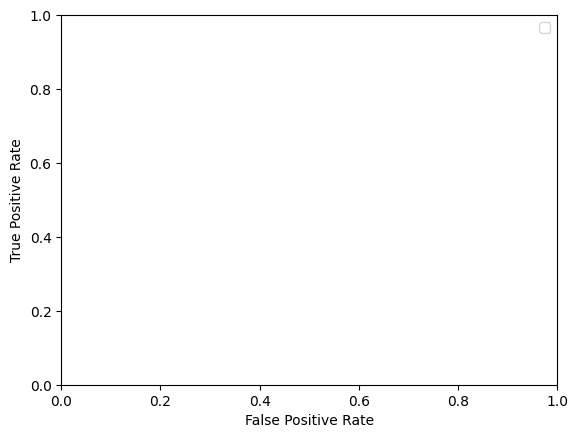

Depth 5 Split 2  :  0.5964760861177103


NameError: name 'pyplot' is not defined

In [45]:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()
from sklearn.tree import DecisionTreeClassifier

dt_5_2 = DecisionTreeClassifier(max_depth=10, min_samples_split= 2)  
fit_model(dt_5_2, "Depth 5 Split 2") #BEST

# dt_7_2 = DecisionTreeClassifier(max_depth=7)  
# fit_model(dt_7_2, "Depth 7 Split 2") 

# dt_5_5 = DecisionTreeClassifier(max_depth=5, min_samples_split=5)  
# fit_model(dt_5_5, "Depth 5 Split 5") #BEST

# dt_7_5 = DecisionTreeClassifier(max_depth=7, min_samples_split=5)  
# fit_model(dt_7_5, "Depth 7 Split 5") 

# dt_3_2 = DecisionTreeClassifier(max_depth=3, min_samples_split=2)  
# fit_model(dt_3_2, "Depth 3 Split 2") 

# dt_3_5 = DecisionTreeClassifier(max_depth=3, min_samples_split=5)  
# fit_model(dt_3_5, "Depth 3 Split 5") 

#kn = KNeighborsClassifier(n_neighbors=5)
#fit_model(kn, "k-NN")

#pipe_kn = Pipeline([("scaler", MinMaxScaler()), ("knr", KNeighborsClassifier(n_neighbors=5))])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()


In [146]:
#predicitng using grid searches best model
hospital_death = dt_5_2.predict(Test)


# Create a DataFrame for the predictions
predictions_df = pd.DataFrame(hospital_death, columns=['hospital_death'])

# Add the record ID from the test data to the predictions DataFrame
predictions_df.insert(0, 'RecordID', Test['RecordID'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

In [1]:
#read train and test
dfTrain = pd.read_csv("Data/train.csv")
dfTest = pd.read_csv("Data/test.csv")


NameError: name 'pd' is not defined